# ANN with PyTorch - Fashion MNIST


# Import libraries

In [17]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torchinfo import summary

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42) 

# import dataset

In [5]:
# import dataset
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


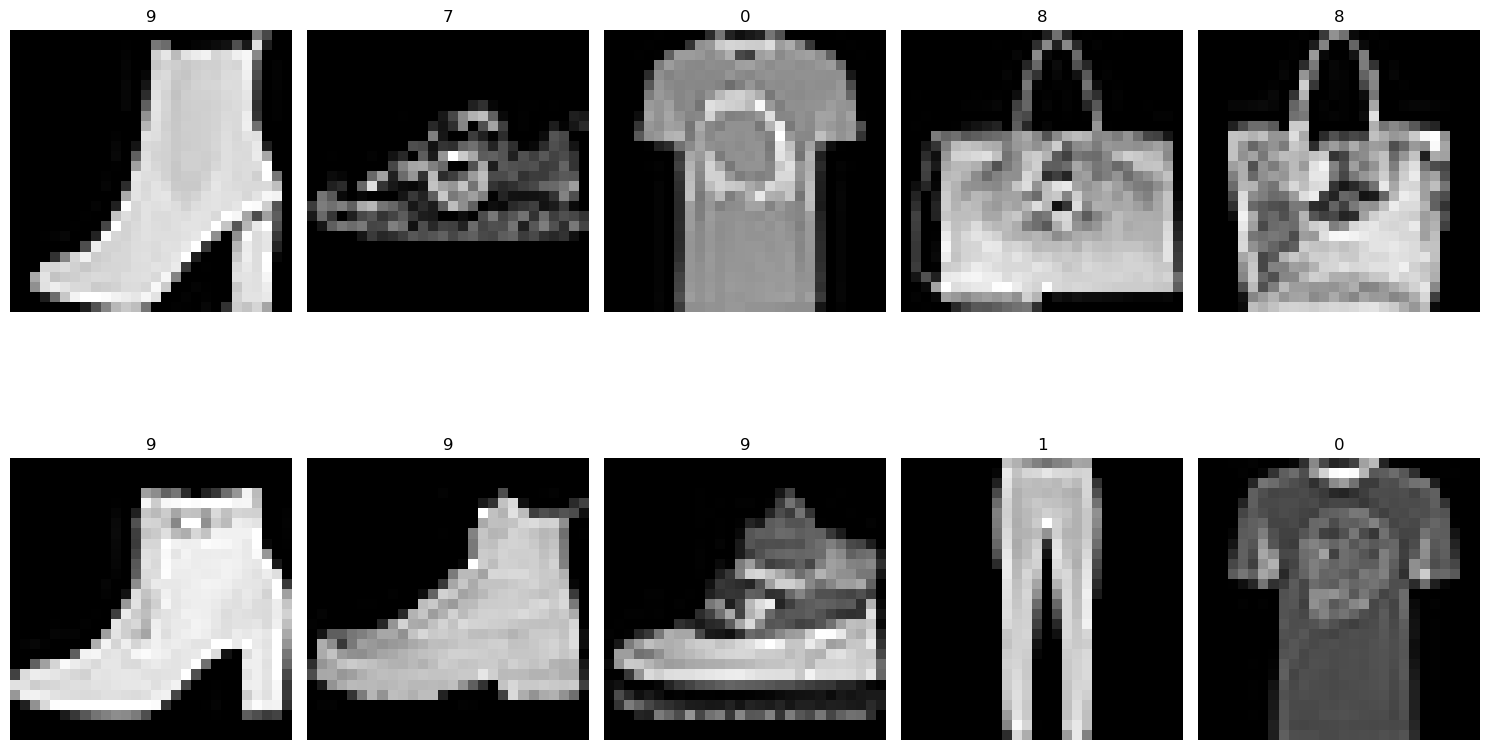

In [9]:
# let's plot first 10 images with 5x5 grid
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
for i in range(10):
    ax[i//5, i%5].imshow(df.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(df.iloc[i, 0])

plt.tight_layout()
plt.show()

## Split the data

In [10]:
# split the data into features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X.shape, y.shape

((6000, 784), (6000,))

In [11]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4800, 784), (1200, 784), (4800,), (1200,))

## Scale the data

In [12]:
# scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# create dataloader

In [13]:
# create CustomDataset class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        return x, y

In [14]:
# create dataloader
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model building

In [15]:
# create model
class MyNN(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.model1 = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        x = self.model1(x)
        return x


In [18]:
# instatiate the model
model = MyNN(X_train.shape[1])
# print model summary
summary(model, input_size=(1, X_train.shape[1]))

Layer (type:depth-idx)                   Output Shape              Param #
MyNN                                     [1, 10]                   --
├─Sequential: 1-1                        [1, 10]                   --
│    └─Linear: 2-1                       [1, 128]                  100,480
│    └─ReLU: 2-2                         [1, 128]                  --
│    └─Linear: 2-3                       [1, 64]                   8,256
│    └─ReLU: 2-4                         [1, 64]                   --
│    └─Linear: 2-5                       [1, 10]                   650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (M): 0.11
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.44
Estimated Total Size (MB): 0.44

In [26]:
# set learning rate & and epochs
lr = 0.1
epochs = 100

In [22]:
# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [27]:
# training loop
for epoch in range(epochs):
 
    for batch_features, batch_labels in train_loader:
        # forward pass
        outputs = model(batch_features)

        # calculate loss
        loss = criterion(outputs, batch_labels)

        # zero gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()

    print(f"Epoch {epoch+1} loss: {loss.item()}")

Epoch 1 loss: 0.23447272181510925
Epoch 2 loss: 0.11484500020742416
Epoch 3 loss: 0.25124073028564453
Epoch 4 loss: 0.3364344537258148
Epoch 5 loss: 0.4468517601490021
Epoch 6 loss: 0.18554528057575226
Epoch 7 loss: 0.14902494847774506
Epoch 8 loss: 0.17238977551460266
Epoch 9 loss: 0.23115825653076172
Epoch 10 loss: 0.22016003727912903
Epoch 11 loss: 0.21575117111206055
Epoch 12 loss: 0.16157856583595276
Epoch 13 loss: 0.1254679411649704
Epoch 14 loss: 0.21653041243553162
Epoch 15 loss: 0.1766723394393921
Epoch 16 loss: 0.12470810860395432
Epoch 17 loss: 0.20512551069259644
Epoch 18 loss: 0.6530084609985352
Epoch 19 loss: 0.08418526500463486
Epoch 20 loss: 0.23155099153518677
Epoch 21 loss: 0.10986950248479843
Epoch 22 loss: 0.38746702671051025
Epoch 23 loss: 0.08632306754589081
Epoch 24 loss: 0.049631744623184204
Epoch 25 loss: 0.10640867799520493
Epoch 26 loss: 0.07051557302474976
Epoch 27 loss: 0.1444486528635025
Epoch 28 loss: 0.09047345072031021
Epoch 29 loss: 0.24070262908935547

# MODEL EVALUATION

In [28]:
# set model to evaluation mode
model.eval()

MyNN(
  (model1): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [30]:
# evaluate model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the test images: {100 * correct / total}%")

Accuracy of the model on the test images: 83.25%
